# Preprocessing

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### Step 1:
- Import the boston house dataset from `sklearn.datasets`. 

`from sklearn.datasets import load_boston`

`boston = load_boston()`

- Create train and test datasets. 

- Check the data description and familiarize yourself with the data.

In [23]:
from sklearn.datasets import load_boston
boston = load_boston()

X = boston.data
y = boston.target

In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [25]:
boston.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [27]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

### Step 2:
Create a scatter plot of each attribute with the mean house price.

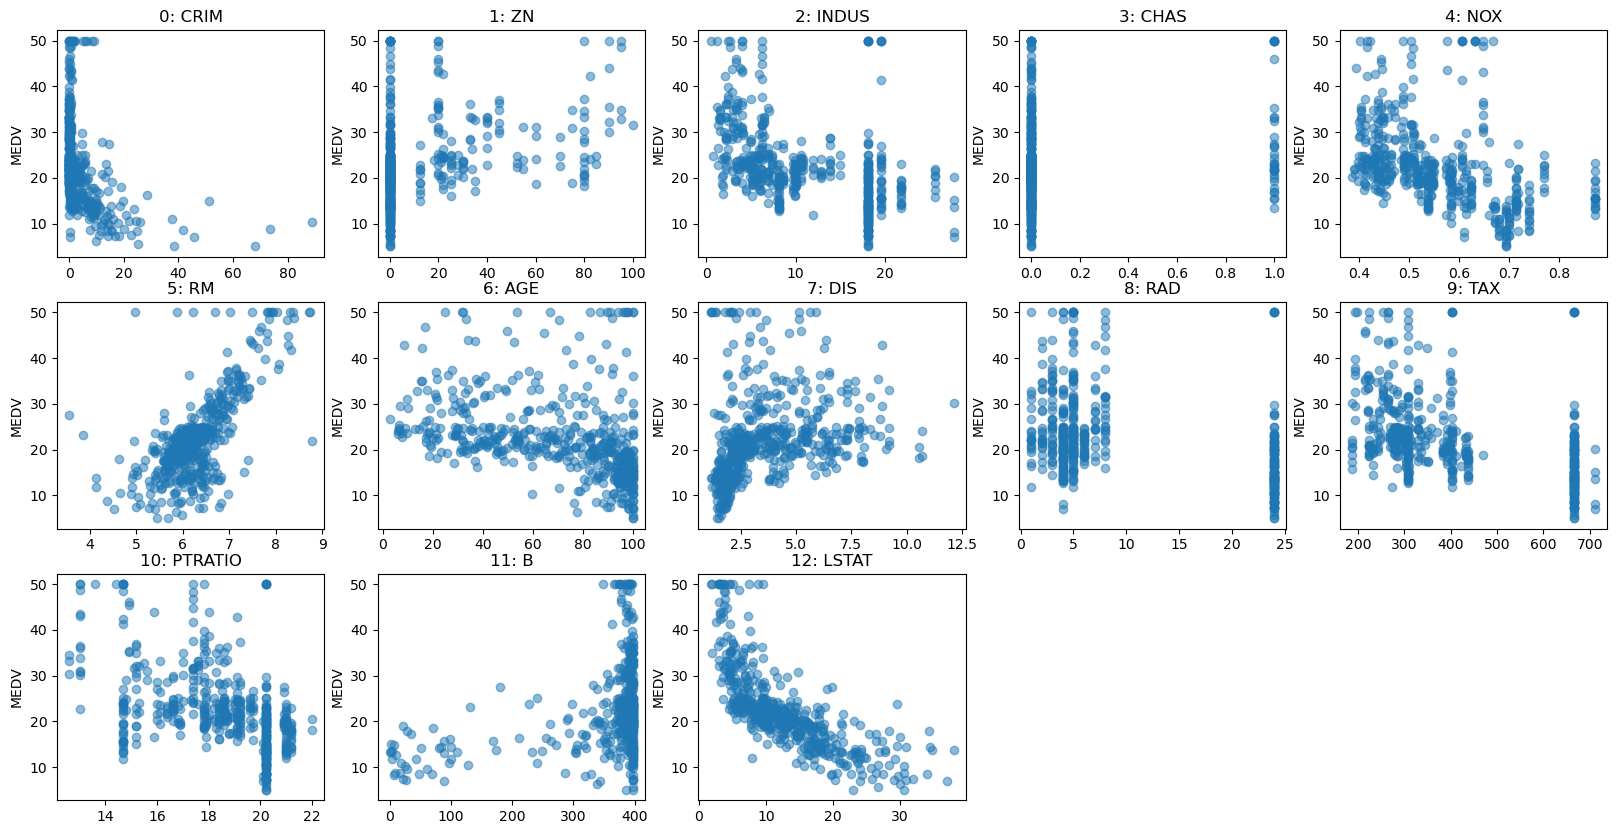

In [35]:
fig, axes = plt.subplots(3, 5, figsize=(20,10))
for i, ax in enumerate(axes.ravel()):
    if i > 12:
        ax.set_visible(False)
        continue
    ax.plot(X[:, i], y, 'o', alpha=.5)
    ax.set_title("{}: {}".format(i, boston.feature_names[i]))
    ax.set_ylabel("MEDV")

In [ ]:
"""axes.ravel(): 
   turning matrix into a vector so that i can loop over it"""

### Step 3:
Create a box plot of all attributes.

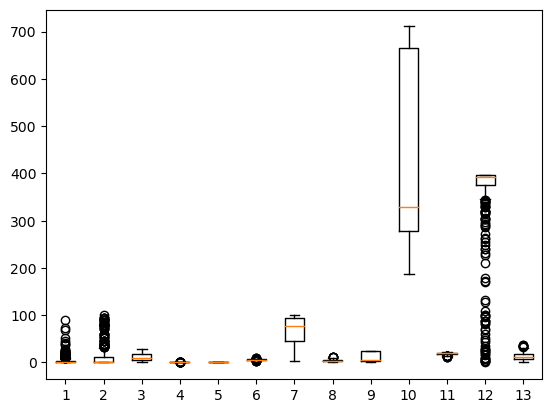

In [50]:
plt.boxplot(X)
plt.show()

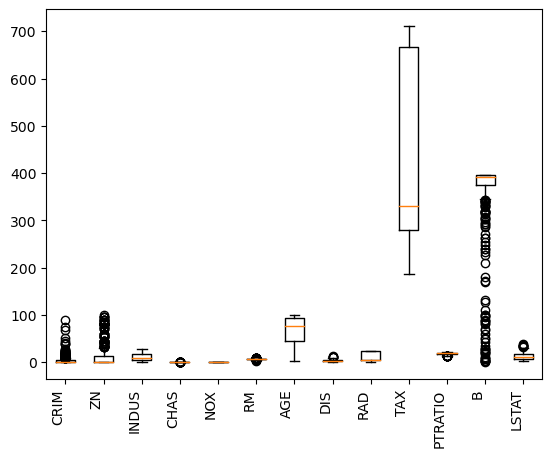

In [51]:
plt.boxplot(X)
plt.xticks(np.arange(1, X.shape[1] + 1),
           boston.feature_names, rotation=90, ha="right"); #horizontalalignment or ha

### Step 4:
Use `StandardScaler()` to scale the training data set.

In [54]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [56]:
X_train_scaled = scaler.fit_transform(X_train)

### Step 5:
Use `KNeighborsRegressor()` to fit both not-scaled and scaled datasets. Check the scores of test dataset for both models.

In [69]:
from sklearn.neighbors import KNeighborsRegressor

#not scaled: 
knr = KNeighborsRegressor().fit(X_train, y_train)
#print(knr.score(X_train, y_train))
print(knr.score(X_test, y_test))

#scaled: 
knr_scaled = KNeighborsRegressor().fit(X_train_scaled, y_train)
#print(knr_scaled.score(X_train_scaled, y_train))

X_test_scaled = scaler.transform(X_test)
print(knr_scaled.score(X_test_scaled, y_test))



0.4616380924610112
0.606952770711171


### Step 6:
Repeat Step 5 for `RandomForestRegressor`. Use

`RandomForestRegressor(n_estimators=100, random_state=0)`

In [71]:
from sklearn.ensemble import RandomForestRegressor

# not scaled
rfr = RandomForestRegressor(n_estimators=100, random_state=0).fit(X_train, y_train)
print(rfr.score(X_test, y_test))

# scaled
X_test_scaled = scaler.transform(X_test)
rfr_scaled = RandomForestRegressor(n_estimators=100, random_state=0).fit(X_train_scaled, y_train)
print(rfr_scaled.score(X_test_scaled, y_test))


0.7952684623500126
0.7953897811917161
